## CryoCARE 

In [3]:
ribosome = '/pscratch/sd/h/hnjones/denoise_et/ribosome'
cryocare = ribosome + '/cryocare'
xray = '/global/cfs/projectdirs/xray/kpande/et_denoising/ribosome'
ddw = '/global/cfs/projectdirs/xray/kpande/et_denoising/ribosome/ddw/refined_tomo_full.mrc'
!source ~/.bashrc
!export PYTHONPATH=$PYTHONPATH:/global/homes/h/hnjones/
!source $HOME/.bashrc
!source /global/homes/h/hnjones/.bashrc
!echo $PYTHONPATH
!echo $PATH

cryocare_10k = cryocare + '/10_run/denoised_10k.rec/cryocare_prediction.mrc'
cryocare_50k = cryocare + '/50_run/denoised_50k.rec/cryocare_prediction.mrc'
ground_truth = '/global/cfs/projectdirs/xray/kpande/et_denoising/ribosome/noise_free/noisefree_full_rec.mrc'

import mrcfile
import torch, numpy as np
import matplotlib.pyplot as plt
from codes import fsc_mod as my_fsc

/opt/nersc/pymon:/global/cfs/projectdirs/m4055/kpande:/global/homes/h/hnjones/
/global/common/software/nersc9/jupyter/ex/24-05/nersc-utils:/opt/nersc/pe/bin:/global/common/software/nersc/bin:/opt/nvidia/hpc_sdk/Linux_x86_64/23.9/cuda/12.2/compute-sanitizer:/opt/nvidia/hpc_sdk/Linux_x86_64/23.9/cuda/12.2/bin:/opt/nvidia/hpc_sdk/Linux_x86_64/23.9/cuda/12.2/libnvvp:/opt/nvidia/hpc_sdk/Linux_x86_64/23.9/profilers/Nsight_Compute:/opt/nvidia/hpc_sdk/Linux_x86_64/23.9/profilers/Nsight_Systems/bin:/opt/cray/pe/perftools/23.12.0/bin:/opt/cray/pe/papi/7.0.1.2/bin:/opt/cray/pe/craype/2.7.30/bin:/opt/cray/pe/mpich/8.1.28/ofi/gnu/12.3/bin:/opt/cray/pe/mpich/8.1.28/bin:/opt/cray/libfabric/1.15.2.0/bin:/usr/local/bin:/usr/bin:/bin:/usr/lib/mit/bin:/opt/cray/pe/bin


In [4]:
gtruth = torch.tensor(mrcfile.read(ground_truth))
cryocare_10 = torch.tensor(mrcfile.read(cryocare_10k))
cryocare_50 = torch.tensor(mrcfile.read(cryocare_50k))
ddw = torch.tensor(mrcfile.read(ddw))

In [4]:
print(gtruth.shape, cryocare_10.shape, cryocare_50.shape, ddw.shape)

torch.Size([2000, 200, 2000]) torch.Size([2000, 200, 2000]) torch.Size([200, 2000, 2000]) torch.Size([200, 2000, 2000])


In [5]:
slice = 100

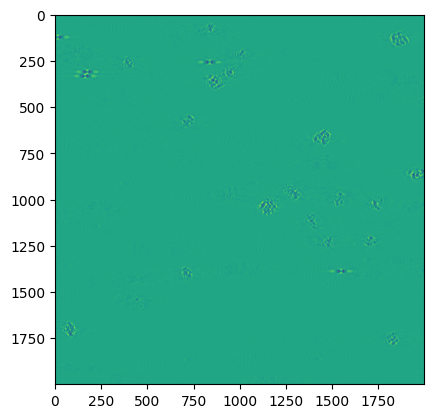

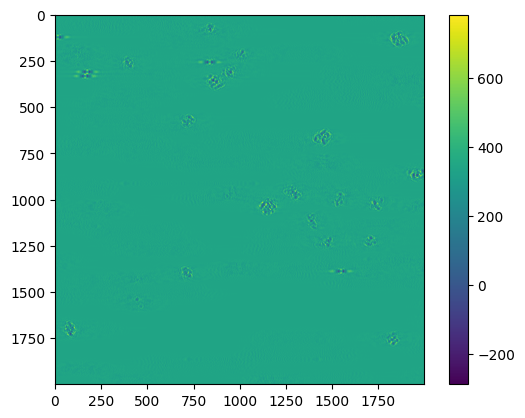

In [10]:
plt.imshow(torch.transpose(gtruth, 0, 1)[slice,:,:].numpy())
plt.show()
plt.imshow(torch.transpose(gtruth, 0, 1)[slice+1,:,:].numpy())
plt.colorbar()



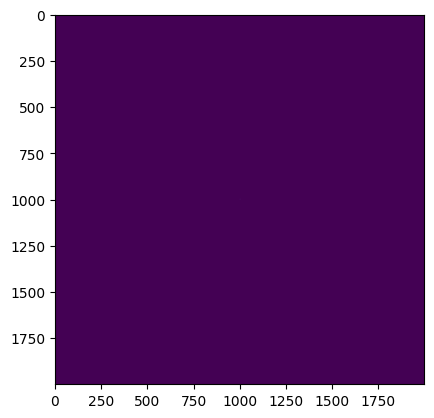

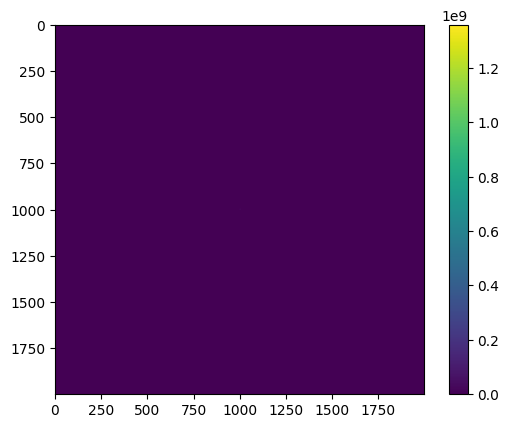

In [6]:
plt.imshow(torch.abs(torch.fft.fftshift(torch.fft.fft2(torch.transpose(gtruth, 0, 1)[slice,:,:]))).numpy())
plt.show()
plt.imshow(torch.abs(torch.fft.fftshift(torch.fft.fft2(torch.transpose(gtruth, 0, 1)[slice+1,:,:]))).numpy())
plt.colorbar()

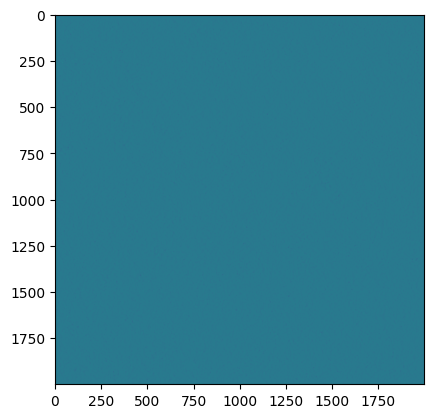

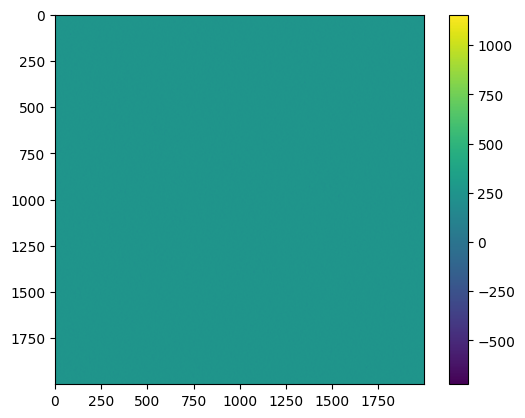

In [15]:
plt.imshow(torch.transpose(cryocare_10,0,1)[slice,:,:].numpy())
plt.show()

plt.imshow(torch.transpose(cryocare_10,0,1)[slice+1,:,:].numpy())
plt.colorbar()

## Try to figure out particle coords

In [60]:
import numpy as np
coordds = torch.Tensor(np.genfromtxt('/global/cfs/projectdirs/xray/kpande/et_denoising/ribosome/ribo_coordinates.txt', skip_header = 2))

In [55]:
orientations = coordds[:,-3:]
coordds = coordds[:,:3]

#500 particles, so 500 rows

In [61]:
print(torch.max(coordds[:,2]), torch.min(coordds[:,2]))
print(torch.max(coordds[:,1]), torch.min(coordds[:,1]))
print(torch.max(coordds[:,0]), torch.min(coordds[:,0]))

tensor(12.9934) tensor(-12.9851)
tensor(563.8648) tensor(-579.9656)
tensor(581.2593) tensor(-583.4919)


In [62]:
coords = coordds[coordds[:,2].argsort()] #sorts by increasing z axis,

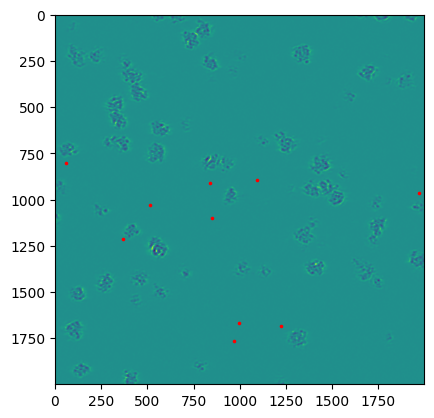

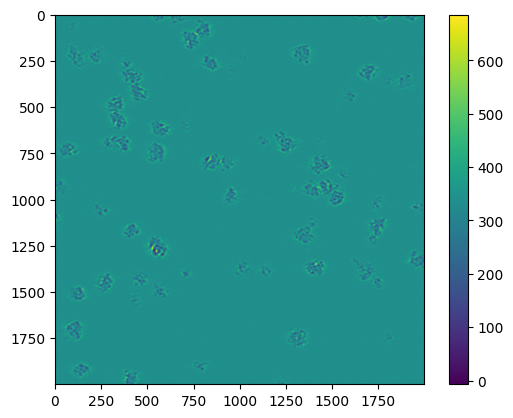

In [114]:
slice = 100 #out of 200
plt.imshow(cryocare_50[slice,:,:].numpy())
plt.scatter(coords[245:255, 0] * 1000/600 + 1000, coords[245:255,1] * 1000 / 600 + 1000, c = 'r', s = 2.5)
plt.show()

plt.imshow(cryocare_50[slice+1,:,:].numpy())
plt.colorbar()

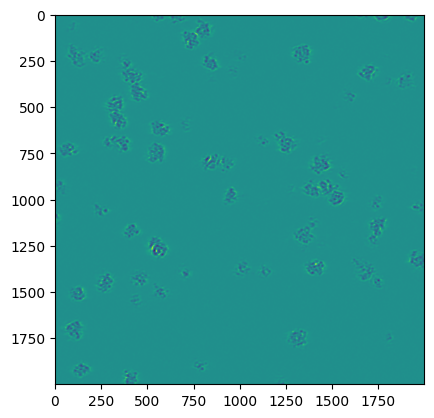

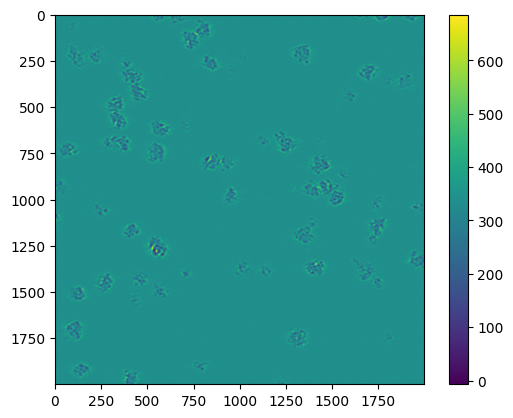

In [31]:
plt.imshow(cryocare_50[slice,:,:].numpy())
plt.show()

plt.imshow(cryocare_50[slice+1,:,:].numpy())
plt.colorbar()

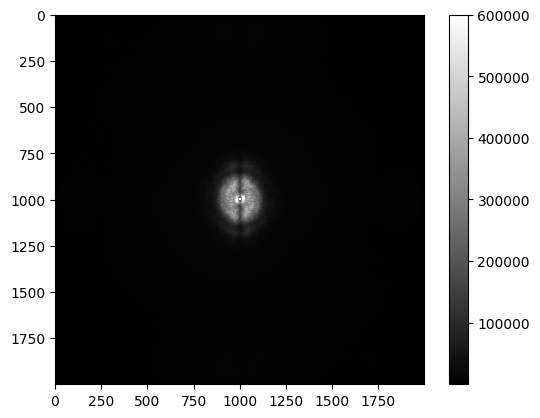

In [45]:
plt.imshow(torch.fft.fftshift(torch.abs(torch.fft.fft2(cryocare_50[slice,:,:]))).numpy(), cmap = 'gray', vmin = 10, vmax = 600000)
plt.colorbar()


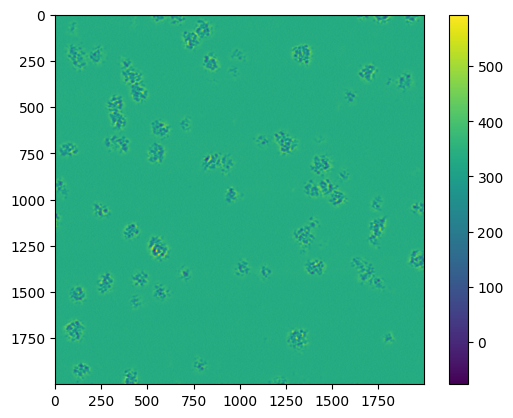

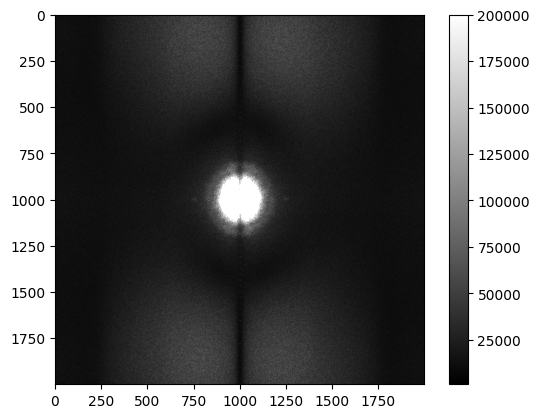

In [30]:
plt.imshow(ddw[slice,:,:].numpy())
plt.colorbar()
plt.show()
plt.imshow(torch.fft.fftshift(torch.abs(torch.fft.fft2(ddw[slice,:,:]))).numpy(), cmap = 'gray', vmin = 1000, vmax = 200000)
plt.colorbar()

In [22]:
print(torch.max(torch.abs(torch.fft.fft2(ddw[slice,:,:]))), torch.min(torch.abs(torch.fft.fft2(ddw[slice,:,:]))), torch.mean(torch.abs(torch.fft.fft2(ddw[slice,:,:]))))

tensor(1.3454e+09) tensor(12.3899) tensor(28376.1738)


In [44]:
print(torch.max(cryocare_10[:,:,:]))
print(torch.max(ddw[:,:,:]))
print(torch.max(cryocare_50[:,:,:]))
print(torch.max(gtruth[:,:,:]))

print(torch.min(cryocare_10[:,:,:]))
print(torch.min(ddw[:,:,:]))
print(torch.min(cryocare_50[:,:,:]))
print(torch.min(gtruth[:,:,:]))

print(torch.std(cryocare_10[:,:,:]))
print(torch.std(ddw[:,:,:]))
print(torch.std(cryocare_50[:,:,:]))
print(torch.std(gtruth[:,:,:]))

print(torch.mean(cryocare_10[:,:,:]))
print(torch.mean(ddw[:,:,:]))
print(torch.mean(cryocare_50[:,:,:]))
print(torch.mean(gtruth[:,:,:]))

tensor(2241.4905)
tensor(681.0898)
tensor(787.7726)
tensor(1248.4309)
tensor(-1875.3591)
tensor(-1279.6355)
tensor(-1206.8088)
tensor(-2310.7788)
tensor(24.2722)
tensor(23.1441)
tensor(15.7181)
tensor(39.3589)
tensor(252.4540)
tensor(336.2005)
tensor(338.3104)
tensor(339.5225)


In [47]:
ddwbins, ddw = my_fsc.compute_rfsc(torch.transpose(gtruth, 0, 1), ddw)
care_10_bins, care_10 = my_fsc.compute_rfsc(torch.transpose(gtruth,0,1), torch.transpose(cryocare_10,0,1))
care_50_bins, care_50 = my_fsc.compute_rfsc(torch.transpose(gtruth,0,1), cryocare_50)

In [51]:
print(care_10_bins.shape)

torch.Size([174])


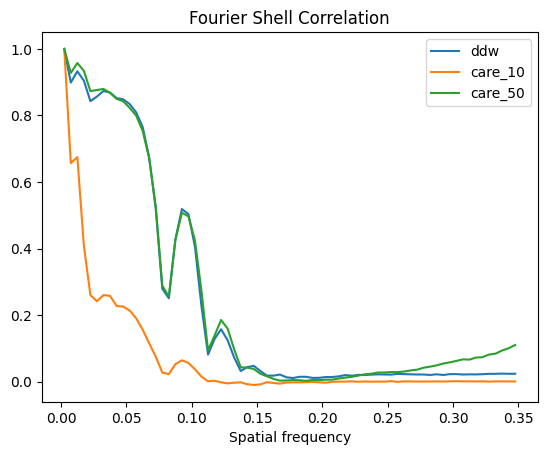

In [54]:
end_index = 70
plt.plot(ddwbins.numpy()[:end_index], np.real(ddw.numpy())[:end_index], label = 'ddw')
plt.plot(care_10_bins.numpy()[:end_index], np.real(care_10.numpy())[:end_index], label = 'care_10')
plt.plot(care_50_bins.numpy()[:end_index], np.real(care_50.numpy())[:end_index], label = 'care_50')
plt.title('Fourier Shell Correlation')
plt.xlabel('Spatial frequency')
plt.legend()